# Notebook d'Analyse

## Preliminaries

### Imports

In [5]:
import numpy as np
import pandas as pd

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Data

In [7]:
allin_for_analyze = pd.read_csv("../data/allin_for_analyze.csv")
#On peut simplement le nommé DF aussi

## Data Inspection

In [8]:
df = allin_for_analyze.copy()
df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
0,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
1,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
2,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
3,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
4,5827,True,55.0,11,True,15328,3.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2019,75cl,13%


In [9]:
df.tail()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
1416,4115,True,100.0,11,True,15382,0.0,2018-02-13 11:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1417,4108,True,31.7,0,True,15353,2.0,2018-02-13 10:56:04,Zind-Humbrecht Riesling Herrenweg de Turckheim...,zind-humbrecht-riesling-herrenweg-turckheim-2017,2020-06-03 14:35:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1418,4108,True,31.7,0,True,15353,2.0,2018-02-13 10:56:04,Zind-Humbrecht Riesling Herrenweg de Turckheim...,zind-humbrecht-riesling-herrenweg-turckheim-2017,2020-06-03 14:35:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1419,4138,True,25.7,0,True,15341,6.0,2018-02-13 11:54:31,Zind-Humbrecht Zind 2017,zind-humbrecht-vdf-zind-2017,2020-07-28 15:05:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1420,4138,True,25.7,0,True,15341,6.0,2018-02-13 11:54:31,Zind-Humbrecht Zind 2017,zind-humbrecht-vdf-zind-2017,2020-07-28 15:05:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [10]:
df.sample(10)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
995,4686,True,14.0,6,True,16324,2.0,2018-04-17 16:47:34,Cosse Maisonneuve Cahors Solis 2018,matthieu-cosse-cahors-solis-2018,2020-07-10 09:30:15,both,1.5 kg,Sud Ouest,Matthieu Cosse,Cahors,Rouge,2018,75cl,13%
123,4183,True,21.4,48,True,15746,0.0,2018-02-15 09:39:10,Borie La Vitarèle Saint-Chinian Les Crès 2016,borie-la-vitarele-saint-chinian-les-cres-2016,2020-08-07 17:35:02,both,1.5 kg,Languedoc-Roussillon,Borie La Vitarèle,Saint-Chinian,Rouge,2018,75cl,"14,50%"
482,4681,True,7.1,178,True,15933,12.0,2018-04-17 16:24:35,Domaine de Joy Côtes de Gascogne Blanc Moelleu...,domaine-de-joy-cotes-de-gascogne-blanc-moelleu...,2020-08-25 18:25:03,both,1.5 kg,Sud Ouest,Domaine de Joy,Côte de Gascogne,Blanc,2020,75cl,"12,50%"
1348,4665,True,14.4,6,True,15404,2.0,2018-04-17 11:00:54,Vincent Carême Vouvray Sec 2018,vincent-careme-vouvray-sec-2018,2020-08-05 09:30:19,both,1.5 kg,Vallée de la Loire,Vincent Carême,Vouvray,Blanc,2020,75cl,"13,50%"
561,4901,True,41.0,36,True,14802,0.0,2018-05-15 09:44:00,Domaine Des Croix Beaune 1er Cru Les Cent Vign...,domaine-des-croix-beaune-1er-cru-les-cent-vign...,2020-01-03 16:56:04,both,1.5 kg,Bourgogne,Domaine des Croix,Beaune 1er Cru,Rouge,2019,75cl,"12,50%"
1204,5696,True,17.5,35,True,15797,0.0,2019-01-30 16:47:30,Planeta Sicilia Etna Bianco 2018,planeta-sicilia-etna-bianco-2018,2020-08-22 09:25:02,both,1.5 kg,Italie,Planeta,Sicilia,Blanc,2018,75cl,"13,50%"
171,6663,True,50.4,6,True,16152,0.0,2020-02-22 14:01:55,Catherine et Claude Maréchal Pommard La Chaniè...,catherine-et-claude-marechal-pommard-la-chanie...,2020-07-16 11:45:03,both,1.5 kg,Bourgogne,Catherine et Claude Maréchal,Pommard,Rouge,2017,75cl,"13,50%"
26,5619,True,71.3,13,True,15922,0.0,2019-01-15 16:42:01,"Albert Boxler Riesling Grand Cru Sommerberg ""E...",albert-boxler-riesling-grand-cru-sommerberg-e-...,2020-08-25 14:00:05,both,1.5 kg,Alsace,Albert Boxler,Alsace Grand Cru,Blanc,2019,75cl,13%
919,5819,True,56.0,1,True,11933,1.0,2019-03-26 17:57:25,Maison Trimbach Riesling Cuvée Frédéric Emile ...,maison-trimbach-riesling-cfe-2008,2020-06-20 09:55:02,both,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
573,6206,True,25.2,120,True,16580,41.0,2019-07-24 09:31:48,Domaine Giudicelli Patrimonio Blanc 2019,domaine-giudicelli-patrimonio-blanc-2019,2020-08-27 10:12:58,both,1.5 kg,Corse,Domaine Giudicelli,Patrimonio,Blanc,2020,75cl,"13,50%"


In [11]:
df.dtypes

product_id          int64
onsale_web           bool
price             float64
stock_quantity      int64
stock_status         bool
sku                 int64
total_sales       float64
post_date          object
post_title         object
post_name          object
post_modified      object
_merge             object
poids              object
Région             object
Domaine            object
Appellation        object
Couleur            object
Millésime           int64
Contenance         object
Degré d'alcool     object
dtype: object

In [12]:
df.describe().round(2)

,product_id,price,stock_quantity,sku,total_sales,Millésime
count,1421.00,1421.00,1421.00,1421.00,1420.00,1421.00
mean,5029.71,32.55,28.78,14483.18,4.02,1530.85
std,787.31,27.86,48.10,3007.00,8.53,863.82
min,3847.00,5.20,0.00,-1.00,0.00,0.00
25%,4280.00,14.10,2.00,14371.00,0.00,2008.00
50%,4794.00,23.60,12.00,15378.00,1.00,2018.00
75%,5711.00,42.20,35.00,15881.00,4.00,2019.00
max,7338.00,225.00,578.00,19822.00,96.00,2021.00


In [13]:
df.select_dtypes(include='object').describe()

,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Contenance,Degré d'alcool
count,1420,1420,1420,1420,1421,1218,1168,1150,1114,1128,1218,1168
unique,710,708,710,584,2,3,17,134,174,3,7,24
top,2018-02-13 14:48:58,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,8planeta-sicilia-etna-rosso-2018,2020-08-26 15:55:03,both,1.5 kg,Languedoc-Roussillon,Planeta,Champagne,Rouge,75cl,13%
freq,2,4,2,14,1420,1212,178,26,52,598,1130,318


## Analyser le chiffre d’affaires

### CA / produit_ALL ##

In [14]:
# Calcul du CA overall
total_revenue_product = allin_for_analyze['price'] * allin_for_analyze['total_sales']
print(total_revenue_product.sum())

140637.2


### CA/ produit_web ##

In [15]:
allin_for_analyze.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
0,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
1,4158,True,18.5,0,True,16093,0.0,2018-02-13 14:48:58,Planeta Sicilia Etna Rosso 2018,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,both,1.5 kg,Italie,Planeta,Sicilia,Rouge,2020,75cl,13%
2,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
3,5826,True,41.2,0,True,15325,4.0,2019-03-27 17:59:49,Agnès Levet Côte Rôtie Améthyste 2017,agnes-levet-amethyste-2017,2020-05-21 14:00:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2018,75cl,13%
4,5827,True,55.0,11,True,15328,3.0,2019-03-27 18:05:09,Agnès Levet Côte Rôtie Maestria 2017,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,both,1.5 kg,Rhône,Agnès Levet,Côte Rôtie,Rouge,2019,75cl,13%


In [16]:
# Filtrer les produits où la valeur de la colonne "onsaleweb" est True
filtered_allin_FA = allin_for_analyze[allin_for_analyze['onsale_web'] == True]


In [17]:

# Calcul du CA pour chaque produit filtré
filtered_allin_FA['total_revenue'] = filtered_allin_FA['price'] * filtered_allin_FA['total_sales']


C:\Users\josse\AppData\Local\Temp\ipykernel_33724\1125458123.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
filtered_allin_FA[['product_id', 'price', 'total_sales', 'total_revenue']].head()

,product_id,price,total_sales,total_revenue
0,4158,18.5,0.0,0.0
1,4158,18.5,0.0,0.0
2,5826,41.2,4.0,164.8
3,5826,41.2,4.0,164.8
4,5827,55.0,3.0,165.0


In [19]:
# filtered_allin_FA.to_csv('ca_products_.csv', index=False)
# extract csv pour CA/ produit web

### Total chiffre d’affaires réalisé en ligne ##

In [20]:
total_revenue_web = filtered_allin_FA.loc[filtered_allin_FA['onsale_web'] == True, 'total_revenue'].sum()
print("Total chiffre d'affaires des produits en ligne :", total_revenue_web)

Total chiffre d'affaires des produits en ligne : 140637.2


In [21]:
filtered_allin_FA.onsale_web.value_counts(dropna=False)

onsale_web
True    1420
Name: count, dtype: int64

In [22]:
total_revenue_webv2 = filtered_allin_FA['total_revenue'].sum()
print("Total chiffre d'affaires des produits en ligne :", total_revenue_webv2)

Total chiffre d'affaires des produits en ligne : 140637.2


## Analyse sur la variable des erreurs de prix #

### Analyse descriptive

In [23]:
print(allin_for_analyze['price'].describe().round(2))

count    1421.00
mean       32.55
std        27.86
min         5.20
25%        14.10
50%        23.60
75%        42.20
max       225.00
Name: price, dtype: float64


In [24]:
print(allin_for_analyze['total_sales'].describe().round(2))

count    1420.00
mean        4.02
std         8.53
min         0.00
25%         0.00
50%         1.00
75%         4.00
max        96.00
Name: total_sales, dtype: float64


In [25]:
filtered_allin_FA["total_revenue"] == 0

0        True
1        True
2       False
3       False
4       False
        ...  
1416     True
1417    False
1418    False
1419    False
1420    False
Name: total_revenue, Length: 1420, dtype: bool

In [26]:
# Compter le nombre de produits/rows avec un revenu total de 0
count_zero_revenue = (filtered_allin_FA['total_revenue'] == 0).sum()
print("Nombre de produits avec un revenu total de 0 :", count_zero_revenue)

Nombre de produits avec un revenu total de 0 : 652


### Visualisation des données

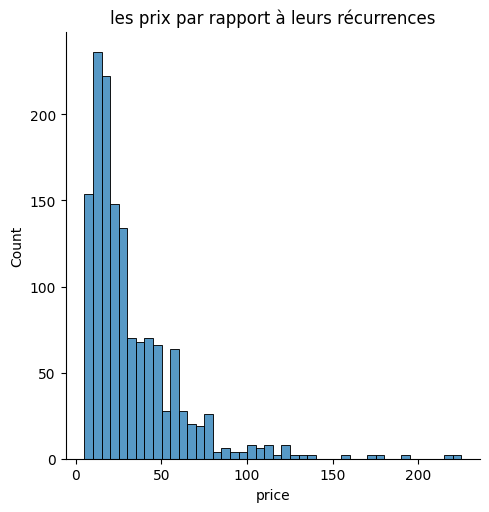

In [27]:
sns.displot(allin_for_analyze["price"])
plt.title("les prix par rapport à leurs récurrences")
plt.show()

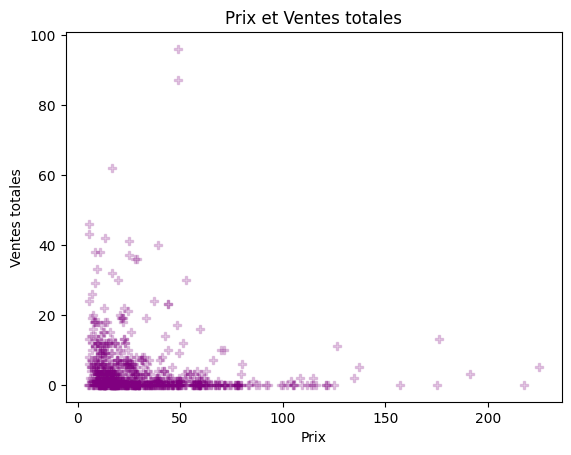

In [28]:
#scatter plot
plt.scatter(allin_for_analyze['price'], allin_for_analyze['total_sales'],
            alpha=0.1, c='purple',marker='P')

plt.title('Prix et Ventes totales')
plt.xlabel('Prix')
plt.ylabel('Ventes totales')
plt.show()

In [29]:
allin_for_analyze.price.describe().astype(int)

count    1421
mean       32
std        27
min         5
25%        14
50%        23
75%        42
max       225
Name: price, dtype: int32

In [30]:
px.box(allin_for_analyze, y="price", title = 'Moyenne des prix')

In [31]:
px.box(allin_for_analyze, y="price", color="Couleur", title= "Moyennes des prix selon le type de vin (couleur)")

C:\Users\josse\AppData\Local\Temp\ipykernel_33724\2045428117.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




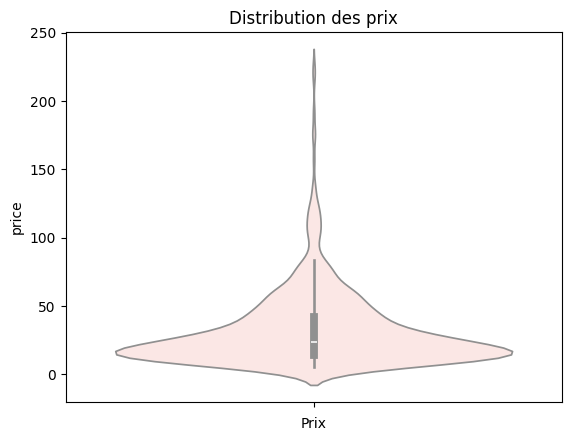

In [32]:
# Diagramme en violon pour exprimer la distribution des prix
sns.violinplot(data=allin_for_analyze['price'], palette=['mistyrose'])
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.show()


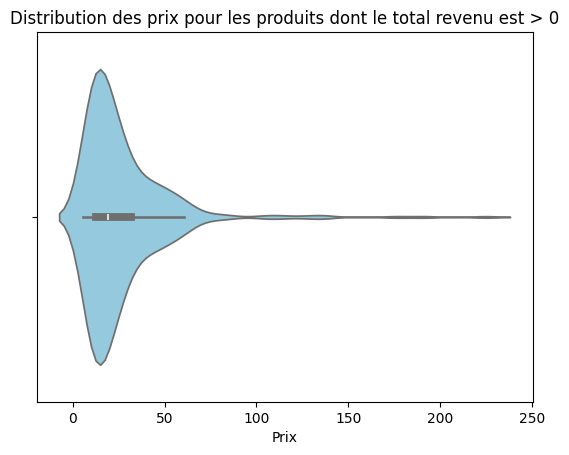

In [33]:
# Filtrer les données pour les produits dont le total revenu est > 0
filtered_data_without_zero = filtered_allin_FA[filtered_allin_FA['total_revenue'] > 0]

sns.violinplot(x=filtered_data_without_zero['price'], color='skyblue')
plt.title('Distribution des prix pour les produits dont le total revenu est > 0')
plt.xlabel('Prix')
plt.show()

### Détection d'anomalies ##

In [34]:
mean_price = allin_for_analyze['price'].mean()
std_price = allin_for_analyze['price'].std()
threshold = 1.5 * std_price  #l'écart-type x1,5 comme mesure de dispersion pour calculer les outliers
outliers = allin_for_analyze[(allin_for_analyze['price'] < mean_price - threshold) | (allin_for_analyze['price'] > mean_price + threshold)]
print('le prix moyen :', round(mean_price,2))
print('écart_type :', round(std_price,2))
print('écart_type*1,5 :', round(threshold,2))

le prix moyen : 32.55
écart_type : 27.86
écart_type*1,5 : 41.79


Potential outliers

In [35]:
print("Potential outliers:")
print(outliers)

Potential outliers:
      product_id  onsale_web  price  stock_quantity  stock_status    sku  \
138         5767        True  175.0              12          True  15185   
139         5767        True  175.0              12          True  15185   
192         5025        True  112.0               0          True  13914   
193         5025        True  112.0               0          True  13914   
196         5026        True   86.8               2          True  13913   
...          ...         ...    ...             ...           ...    ...   
1400        4139        True   77.4               7          True  13217   
1407        4132        True   88.4               5          True  11668   
1408        4132        True   88.4               5          True  11668   
1415        4115        True  100.0              11          True  15382   
1416        4115        True  100.0              11          True  15382   

      total_sales            post_date  \
138           0.0  2019-0

Outliers avec la méthode IQ

In [36]:
# Calcul des quartiles
Q1 = allin_for_analyze['price'].quantile(0.25)
Q3 = allin_for_analyze['price'].quantile(0.75)

# Calcul IQR
IQR = Q3 - Q1

# Déterminer les limites pour les outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identification des outliers
outliers_IQR = allin_for_analyze[(allin_for_analyze['price'] < lower_limit) | (allin_for_analyze['price'] > upper_limit)]


In [37]:
outliers_IQR.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,post_modified,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool
138,5767,True,175.0,12,True,15185,0.0,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,both,1.5 kg,Bourgogne,Camille Giroud,Clos de Vougeot,Rouge,2016,75cl,13%
139,5767,True,175.0,12,True,15185,0.0,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,both,1.5 kg,Bourgogne,Camille Giroud,Clos de Vougeot,Rouge,2016,75cl,13%
192,5025,True,112.0,0,True,13914,0.0,2018-07-18 10:39:43,Champagne Agrapart &amp; Fils L'Avizoise Extra...,champagne-agrapart-fils-lavizoise-grand-cru-20...,2020-07-09 17:05:02,both,1.5 kg,Champagne,Agrapart & Fils,Champagne,Blanc,2015,75cl,12%
193,5025,True,112.0,0,True,13914,0.0,2018-07-18 10:39:43,Champagne Agrapart &amp; Fils L'Avizoise Extra...,champagne-agrapart-fils-lavizoise-grand-cru-20...,2020-07-09 17:05:02,both,1.5 kg,Champagne,Agrapart & Fils,Champagne,Blanc,2015,75cl,12%
196,5026,True,86.8,2,True,13913,0.0,2018-07-18 10:46:30,Champagne Agrapart &amp; Fils Minéral Extra Br...,champagne-agrapart-fils-mineral-extra-brut-bla...,2020-05-11 14:35:02,both,1.5 kg,Champagne,Agrapart & Fils,Champagne,Blanc,2015,75cl,12%


In [38]:
outliers_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 138 to 1416
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      64 non-null     int64  
 1   onsale_web      64 non-null     bool   
 2   price           64 non-null     float64
 3   stock_quantity  64 non-null     int64  
 4   stock_status    64 non-null     bool   
 5   sku             64 non-null     int64  
 6   total_sales     64 non-null     float64
 7   post_date       64 non-null     object 
 8   post_title      64 non-null     object 
 9   post_name       64 non-null     object 
 10  post_modified   64 non-null     object 
 11  _merge          64 non-null     object 
 12  poids           46 non-null     object 
 13  Région          36 non-null     object 
 14  Domaine         36 non-null     object 
 15  Appellation     44 non-null     object 
 16  Couleur         36 non-null     object 
 17  Millésime       64 non-null     int64 

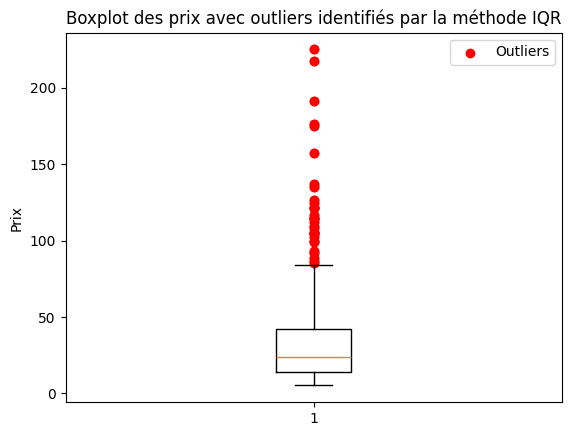

In [60]:
plt.boxplot(allin_for_analyze['price'], showfliers=False)  # Ne pas afficher les outliers
plt.title('Boxplot des prix avec outliers identifiés par la méthode IQR')
plt.ylabel('Prix')

# Ajout des outliers
plt.scatter(x=[1] * len(outliers_IQR), y=outliers_IQR['price'], color='red', label='Outliers')

plt.legend()
plt.show()

In [59]:
fig_IQR = go.Figure()

# Ajout main box
fig_IQR.add_trace(go.Box(y=allin_for_analyze['price'], name='Prix', boxmean=True, boxpoints='outliers'))

# Ajout des outliers
fig_IQR.add_trace(go.Scatter(y=outliers_IQR['price'], mode='markers', marker=dict(color='red'), name='Outliers'))

fig_IQR.update_layout(title='Boxplot des prix avec outliers identifiés par la méthode IQR', yaxis_title='Prix')

fig_IQR.show()


Outliers avec la méthode Z score

In [42]:
# Calcul de la moyenne et de l'écart type
mean_price_Z = allin_for_analyze['price'].mean()
std_price_Z = allin_for_analyze['price'].std()

# Calcul du score Z pour chaque prix
allin_for_analyze['z_score'] = (allin_for_analyze['price'] - mean_price_Z) / std_price_Z

# Identification des outliers
outliers_Z_score = allin_for_analyze[abs(allin_for_analyze['z_score']) > 3] 
#+ de 3 écarts-types de la moyenne sont considérées outliers

In [43]:
outliers_Z_score.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_name,...,_merge,poids,Région,Domaine,Appellation,Couleur,Millésime,Contenance,Degré d'alcool,z_score
138,5767,True,175.0,12,True,15185,0.0,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,...,both,1.5 kg,Bourgogne,Camille Giroud,Clos de Vougeot,Rouge,2016,75cl,13%,5.112843
139,5767,True,175.0,12,True,15185,0.0,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,...,both,1.5 kg,Bourgogne,Camille Giroud,Clos de Vougeot,Rouge,2016,75cl,13%,5.112843
202,4355,True,126.5,2,True,12589,11.0,2018-03-02 10:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,...,both,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,0,75cl,"12,50%",3.372111
203,4355,True,126.5,2,True,12589,11.0,2018-03-02 10:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,...,both,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,0,75cl,"12,50%",3.372111
206,4352,True,225.0,0,True,15940,5.0,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,...,both,1.5 kg,Champagne,Egly-Ouriet,Champagne,Blanc,0,75cl,"12,50%",6.907412


In [44]:
outliers_Z_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 138 to 1368
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      28 non-null     int64  
 1   onsale_web      28 non-null     bool   
 2   price           28 non-null     float64
 3   stock_quantity  28 non-null     int64  
 4   stock_status    28 non-null     bool   
 5   sku             28 non-null     int64  
 6   total_sales     28 non-null     float64
 7   post_date       28 non-null     object 
 8   post_title      28 non-null     object 
 9   post_name       28 non-null     object 
 10  post_modified   28 non-null     object 
 11  _merge          28 non-null     object 
 12  poids           24 non-null     object 
 13  Région          20 non-null     object 
 14  Domaine         20 non-null     object 
 15  Appellation     24 non-null     object 
 16  Couleur         20 non-null     object 
 17  Millésime       28 non-null     int64 

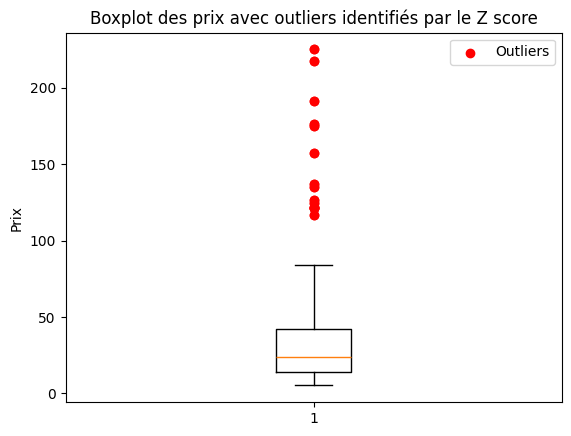

In [57]:
plt.boxplot(allin_for_analyze['price'], showfliers=False)  # Ne pas afficher les outliers
plt.title('Boxplot des prix avec outliers identifiés par le Z score')
plt.ylabel('Prix')

# Ajout des outliers
plt.scatter(x=[1] * len(outliers_Z_score), y=outliers_Z_score['price'], color='red', label='Outliers')

plt.legend()
plt.show()

In [58]:
fig_Z = go.Figure()

# Ajout main box
fig_Z.add_trace(go.Box(y=allin_for_analyze['price'], name='Prix', boxmean=True, boxpoints='outliers'))

# Ajout des outliers
fig_Z.add_trace(go.Scatter(y=outliers_Z_score['price'], mode='markers', marker=dict(color='red'), name='Outliers'))

fig_Z.update_layout(title='Boxplot des prix avec outliers identifiés par le Z-score', yaxis_title='Prix')

fig_Z.show()

## Next step

Anticipation des produits à risque "out of stock"

In [46]:
# Filtrer les lignes avec stock_status - 10 total_sales supérieur à 3
data_remise_en_stock = allin_for_analyze[(allin_for_analyze['stock_quantity'] < 10 ) & (allin_for_analyze['total_sales'] > 4)]

# Afficher les données filtrées
print(data_remise_en_stock)

      product_id  onsale_web  price  stock_quantity  stock_status    sku  \
8           4920        True   24.4               1          True  15530   
9           4920        True   24.4               1          True  15530   
10          4919        True   24.4               0          True  15531   
11          4919        True   24.4               0          True  15531   
12          4918        True   37.2               0          True  15533   
...          ...         ...    ...             ...           ...    ...   
1286        4876        True   22.8               4          True  16289   
1329        4870        True    9.3               0          True  16149   
1330        4870        True    9.3               0          True  16149   
1419        4138        True   25.7               0          True  15341   
1420        4138        True   25.7               0          True  15341   

      total_sales            post_date  \
8            10.0  2018-05-17 11:17:53   
9  